## Week 4 Lab exercises

In this week we will continue to practise the use of classes, and the numerical solution of higher order non linear ordinary differential equations (ODEs). 

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 

I have written a class below for integrating equations that implements the Euler method. Update it to include the midpoint method and (OPTIONALLY) a 4th order Runge-Kutta method (from scratch, not just by including solve_ivp()!). Be sure to add in asserts to sense check what the class is doing.

/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_45065/1849119705.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0
/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_45065/1849119705.py:102: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0
/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_45065/1849119705.py:120: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime

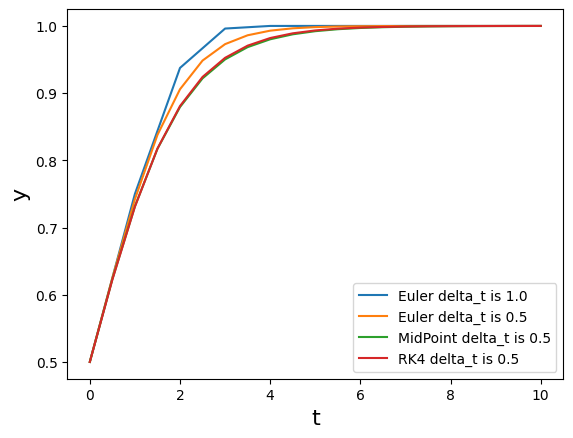

In [35]:
# ExplicitIntegrator class

class ExplicitIntegrator :

    """
    Contains explicit methods to integrate ODEs
    
    attributes: the function to calculate the gradient dydt, max_time, 
                N_time_steps, method
                
    methods: calculate_solution, plot_solution
    
    """
    integration_methods = ["Euler", "MidPoint", "RK4"]
    
    # constructor function
    def __init__(self, dydt, max_time=0, N_time_steps=0, method = "Euler"):
        
        self.dydt = dydt # Note that we are passing in a function, this is ok in python
        self.method = method
        assert self.method in self.integration_methods, 'chosen integration method not implemented'
        
        # Make these private - restrict getting and setting as below
        self._max_time = max_time
        self._N_time_steps = N_time_steps
        
        # Derived from the values above
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, max_time, N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    # Enables the user to get the t solution
    @property
    def y_solution(self):
        return self._y_solution

    # Enables the user to get the y solution
    @property
    def t_solution(self):
        return self._t_solution
    
    @property
    def max_time(self):
        return self._max_time

    @property
    def N_time_steps(self):
        return self._N_time_steps
    
    # Enables the user to reset the max time
    @max_time.setter
    def max_time(self, value):
        self._max_time = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)
        
    # Enables the user to reset the number of time steps
    @N_time_steps.setter
    def N_time_steps(self, value):
        self._N_time_steps = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    def calculate_solution(self, y0) :
        if self.method == "Euler":
            self.integrate_using_Euler(self.dydt, y0)
        elif self.method == 'MidPoint':
            self.integrate_using_midpoint(self.dydt, y0)
        elif self.method == 'RK4':
            self.integrate_using_RK4(self.dydt, y0)
        else :
            assert False, 'integration method not implemented'
            
    def plot_solution(self) :
        
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16) 
        plt.plot(self._t_solution, self._y_solution, '-', 
                 label=self.method + " delta_t is " + str(self._delta_t))
        plt.legend()

    def integrate_using_Euler(self, dydt_function, y0):

        for itime, time in enumerate(self.t_solution):
            if itime == 0:
                self._y_solution[itime] = y0
            else:
                # ✅ Use previous time and previous y
                t_prev = self.t_solution[itime - 1]
                y_prev = self._y_solution[itime - 1]
                
                dydt_at_start = self.dydt(t_prev, y_prev)  # correct evaluation point
                self._y_solution[itime] = y_prev + self._delta_t * dydt_at_start
            
    #UPDATE ME!
    def integrate_using_midpoint(self, dydt_function, y0):

        for itime, time in enumerate(self.t_solution):
            if itime == 0:
                self._y_solution[itime] = y0
            else:
                t_prev = self.t_solution[itime - 1]
                y_prev = self._y_solution[itime - 1]
                # 1. Slope at the start (k1)
                dydt_at_start = self.dydt(t_prev, y_prev)
                # 2. Estimate y at midpoint
                y_mid = y_prev + 0.5 * self._delta_t * dydt_at_start
                # 3. Slope at midpoint (k2)
                dydt_at_midpt = self.dydt(t_prev + 0.5 * self._delta_t, y_mid)
                # 4. Update solution
                self._y_solution[itime] = y_prev + self._delta_t * dydt_at_midpt


    #UPDATE ME (OPTIONALLY)
    def integrate_using_RK4(self, dydt_function, y0):
        for itime, time in enumerate(self.t_solution):
            if itime == 0:
                self._y_solution[itime] = y0
            else:
                t_prev = self.t_solution[itime - 1]
                y_prev = self._y_solution[itime - 1]
                # Get the slope at the beginning of the interval
                k1 = self.dydt(t_prev, y_prev)
                # Get the slope at the midpoint using y and k1
                y_mid_k1 = y_prev + 0.5 * self._delta_t * k1
                k2 = self.dydt(t_prev + 0.5 * self._delta_t, y_mid_k1)
                # Get the slope at midpoint, now using y and k2
                y_mid_k2 = y_prev + 0.5 * self._delta_t * k2
                k3 = self.dydt(t_prev + 0.5 * self._delta_t, y_mid_k2)
                # Get the slope at the end of the interval
                y_end = y_prev + self._delta_t * k3
                k4 = self.dydt(t_prev + self._delta_t, y_end)
                # Update solution
                self._y_solution[itime] = y_prev + (self._delta_t / 6) * (
                    k1 + 2 * k2 + 2 * k3 + k4)
    
# How to use the class - example for the logistic equation

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dy/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 10

# Define an object of the class
logistic_integrator = ExplicitIntegrator(calculate_logistic_dydt, max_time, 
                                         N_time_steps, "Euler")

# Find and plot the solution
y0 = np.array([0.5])
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
#print(logistic_integrator.y_solution)

#Update the number of steps and plot again
logistic_integrator.N_time_steps = 20 # Note how this changes the other attributes above
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
#print(logistic_integrator.y_solution)

logistic_integrator.method = 'MidPoint'
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()

logistic_integrator.method = 'RK4'
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()

### ACTIVITY 2:
    
Test the above integrator class on one of the simple differential equations that we have studied so far, and confirm that the convergence orders you obtain when doubling the resolution for each method are as expected.

In [55]:
# Test the integrator

# Note that the function has to take t as the first argument and y as the second
def calculate_my_dydt(t, y):
    """Returns the gradient dy/dt for the polynomial equation"""
    dydt = -y + t
    return dydt

y0 = 0
max_time = 2
N_time_steps = 5

# Check the convergence for the Euler method first
euler1 = ExplicitIntegrator(calculate_my_dydt, max_time, N_time_steps, "Euler")
euler1.calculate_solution(y0)
y1_euler = euler1.y_solution[-1]
euler2 = ExplicitIntegrator(calculate_my_dydt, max_time, 2 * N_time_steps, "Euler")
euler2.calculate_solution(y0)
y2_euler = euler2.y_solution[-1]
euler3 = ExplicitIntegrator(calculate_my_dydt, max_time, 4 * N_time_steps, "Euler")
euler3.calculate_solution(y0)
y3_euler = euler3.y_solution[-1]
err_euler = (y3_euler - y2_euler) / (y2_euler - y1_euler)

# Let us now test the convergence for the Midpoint method
midpt1 = ExplicitIntegrator(calculate_my_dydt, max_time, N_time_steps, "MidPoint")
midpt1.calculate_solution(y0)
y1_midpt = midpt1.y_solution[-1]
midpt2 = ExplicitIntegrator(calculate_my_dydt, max_time, 2 * N_time_steps, "MidPoint")
midpt2.calculate_solution(y0)
y2_midpt = midpt2.y_solution[-1]
midpt3 = ExplicitIntegrator(calculate_my_dydt, max_time, 4 * N_time_steps, "MidPoint")
midpt3.calculate_solution(y0)
y3_midpt = midpt3.y_solution[-1]
err_midpt = (y3_midpt - y2_midpt) / (y2_midpt - y1_midpt)

# Finally, we test the convergence for the RK4 method
RK1 = ExplicitIntegrator(calculate_my_dydt, max_time, N_time_steps, "RK4")
RK1.calculate_solution(y0)
y1_RK = RK1.y_solution[-1]
RK2 = ExplicitIntegrator(calculate_my_dydt, max_time, 2 * N_time_steps, "RK4")
RK2.calculate_solution(y0)
y2_RK = RK2.y_solution[-1]
RK3 = ExplicitIntegrator(calculate_my_dydt, max_time, 4 * N_time_steps, "RK4")
RK3.calculate_solution(y0)
y3_RK = RK3.y_solution[-1]
err_RK = (y3_RK - y2_RK) / (y2_RK - y1_RK)

print(f"Error (Euler) = {err_euler:.2f}, Error (MidPoint) = {err_midpt:.2f} and Error (RK4) = {err_RK:.2f}")

Error (Euler) = 0.48, Error (MidPoint) = 0.20 and Error (RK4) = 0.05


### ACTIVITY 3:

Write a class that contains information about the Van der Pol oscillator with a source, and solves the second order ODE related to its motion using scipy's solve_IVP method:

$\frac{d^2y}{dt^2} - 2a (1-y^2) \frac{dy}{dt} + y = f(t)$

where $a$ is a damping factor. Your class should allow you to pass in the source function f(t) as an argument that can be changed. 

_HINT: It may help to start with the Ecosystem class in the solutions for last week's tutorial and modify this._

What parts or features of the differential equation tell us if it is:

1. Second or first order
2. Autonomous
3. Linear / non linear
4. Dimension 1 or 2?

In [80]:
class VanDerPolOscillator:
    
   """
   Represents the Val der Pol oscillator with a source
   
   attributes: damping factor, a
      
   methods:
   integrate the ODEs for a given initial condition, plot the result, 
   dydt and d2ydt2 for the equations
   
   """
   
   # Constructor function
   def __init__(self, f_t, a=0.0, max_time=10):
      self.f_t = f_t
      self.a = a
      self.max_time = max_time
      self._solution_y = []
      self._solution_dydt = []
      self._solution_t = []
   
   def integrate_vanderpol_equation(self, initial_values, N_time_steps=100):
      t_solution = np.linspace(0.0, self.max_time, N_time_steps + 1)
      solution = solve_ivp(self.calculate_vanderpol_d2ydt2, [0, self.max_time], 
                           initial_values, t_eval=t_solution)
      self._solution_t = solution.t
      self._solution_y = solution.y[0]
      self._solution_dydt = solution.y[1]
   
   def calculate_vanderpol_d2ydt2(self, t, Y):
      y, dydt = Y
      return [
         dydt,
         2 * self.a * (1 - y ** 2) * dydt - y + self.f_t(t)
      ]
   
   def plot_solution(self):
      assert self._solution_t.size != 0, 'Solution has not been found yet!'
      plt.grid()
      plt.plot(self._solution_t, self._solution_y, label='y(t)')
      plt.plot(self._solution_t, self._solution_dydt, label='dy/dt')      
      plt.xlabel('t')
      plt.legend()
      plt.show()

   def plot_phase_chart(self, initial_conditions_list, N_time_steps=1000):
      plt.figure(figsize=(6, 6))
      for y0 in initial_conditions_list:
         solution = solve_ivp(
            self.calculate_vanderpol_d2ydt2,
            [0, self.max_time],
            y0,
            t_eval=np.linspace(0, self.max_time, N_time_steps)
         )
         y = solution.y[0]
         dydt = solution.y[1]
         plt.plot(y, dydt, label=f"y0={y0[0]}, dy0={y0[1]}")
      plt.xlabel('y')
      plt.ylabel('dy/dt')
      plt.title('Van der Pol Oscillator Phase Portrait')
      plt.legend()
      plt.grid(True)
      plt.show()

### ACTIVITY 4

Initially set $f(t) = 0$. 

Add a method to make a phase plot $(y, dy/dt)$ of the solutions for a range of initial conditions. What do you observe about the behaviour?

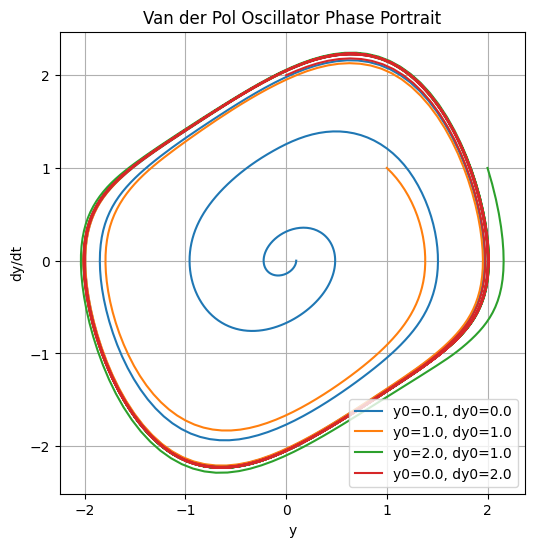

In [81]:
# Phase plot

f_t = lambda t: 0.0
max_time = 50
my_oscillator = VanDerPolOscillator(f_t, a=0.25, max_time=max_time)
initial_conditions = [
    [0.1, 0.0],
    [1.0, 1.0],
    [2.0, 1.0],
    [0.0, 2.0],
]
my_oscillator.plot_phase_chart(initial_conditions)

### ACTIVITY 5

Now set $f(t) = \sin(\omega t)$. For what values of $\omega$ do the methods start to fail? Why?

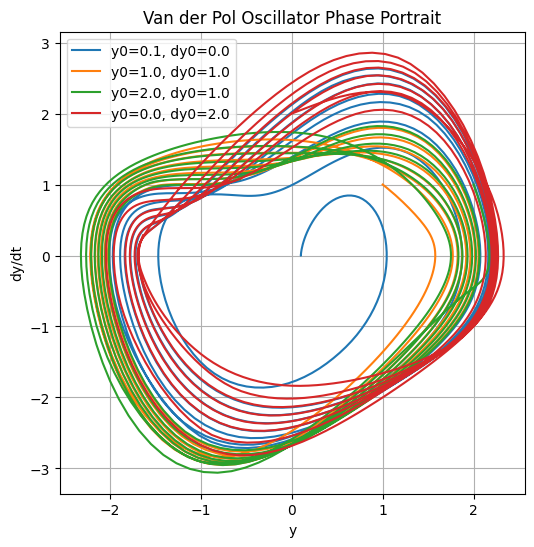

In [84]:
omega = 2
f_t = lambda t: np.sin(omega * t)
max_time = 50
my_oscillator = VanDerPolOscillator(f_t, a=0.25, max_time=max_time)
initial_conditions = [
    [0.1, 0.0],
    [1.0, 1.0],
    [2.0, 1.0],
    [0.0, 2.0],
]
my_oscillator.plot_phase_chart(initial_conditions)

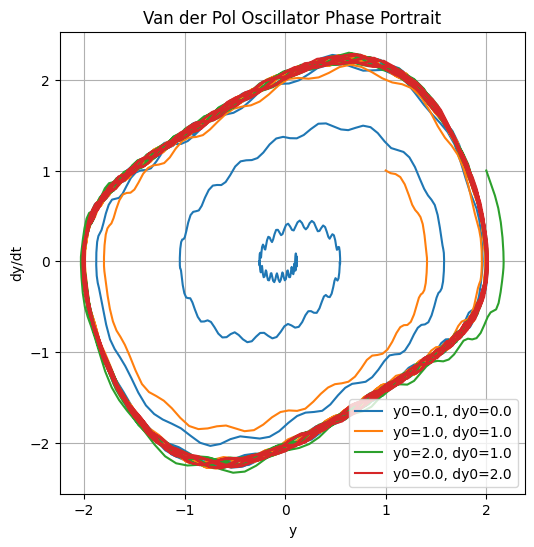

In [88]:
omega = 20
f_t = lambda t: np.sin(omega * t)
max_time = 50
my_oscillator = VanDerPolOscillator(f_t, a=0.25, max_time=max_time)
initial_conditions = [
    [0.1, 0.0],
    [1.0, 1.0],
    [2.0, 1.0],
    [0.0, 2.0],
]
my_oscillator.plot_phase_chart(initial_conditions)